# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Sesion 2, Actividad I
**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>



<hr>


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


## 3. Optimizacion del grado del polinomio. 

### 3.1 Leer el dataset

In [12]:
# Leer el archivo "dataset1.csv" como  Pandas dataframe
df = pd.read_csv('dataset1.csv')

# Eche un vistazo rápido al conjunto de datos

df


,x1,y1
0,0.265960,1.624972
1,0.516805,2.734012
2,0.658542,4.628908
3,1.678052,5.186455
4,2.112463,8.395088
5,2.757320,8.654015
6,3.200844,13.373424
7,3.815254,12.029562
8,4.174084,14.982755
9,5.005190,13.476361


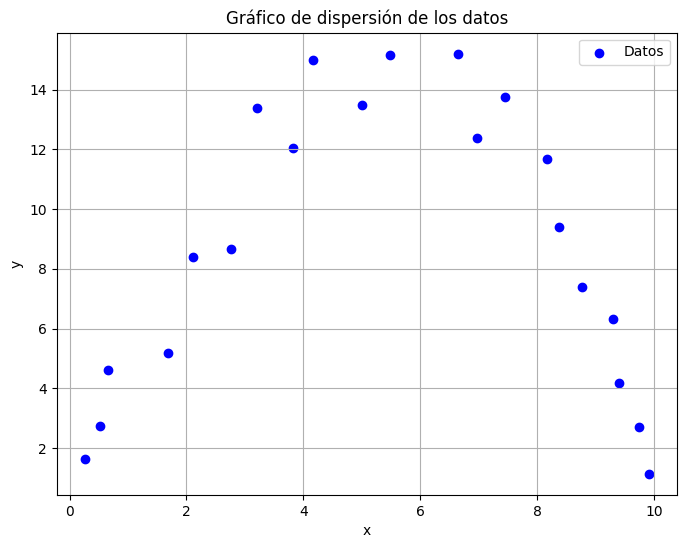

In [14]:
## Graficar los datos
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['y1'], color='blue', label='Datos')
plt.title('Gráfico de dispersión de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### ⏸ Según el gráfico anterior, ¿podria indicar el grado optimo del polinomio para una regresion lineal polinomial?

Respuesta: `Con una de Grado 2`

### 3.2 Obtener las variables de entrada y salida

In [18]:
# Asigne los valores de las columnas x e y a la
# variables predictoras y de respuesta

# Variable de predictora
# Estos es lista de listas
x=df[['x1']].values
# Variable de respuesta
# Estos es una lista 
y=df['y1'].values



### 3.3 Train-validation split

Dividir los datos de entrada en `Train/Validation` sets

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y validación con un conjunto de entrenamiento del 75 %
# Establecer estado_aleatorio=1
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=1)
# Esto es plantar la semilla

In [ ]:
# graficar los sets de train y validacion




Cambiar el estado aleatorio y anotar sus observaciones respecto a la eleccion de los  datos en cada set.

### 3.4 Cálculo del train & validation error en términos de MSE

In [ ]:
# Completar el siguiente codigo

# Seleccionar el grado maximo a iterar
maxdeg = 15
training_error = []
validation_error = []

for d in range(maxdeg):
    # calculo de los polynomial features
    x_poly_train = ...
    x_poly_val   = ...
    # Inicializar el modelo de regresion sin utilizar el intercept
    lreg = ...

    # Ajustar el modelo en los datos de entrenamiento
    ...
    # Utilizar el modelo entrenado para predecir en los datos transformados del train set
    y_train_pred = ...
    
    # Utilizar el modelo entrenado para predecir en los datos transformados del validation set
    y_val_pred   = ...

    # Calcular el error en base a los datos en y_train_pred y y_val_pred
    error_train = ...
    error_val   = ...
    # adicionar los errores calculados a la lista de training_error y validation_error
    training_error.append(...)
    validation_error.append(...)



    

### 3.5 Encontrar el modelo optimo

In [ ]:
###


### 3.6 Graficar el error vs grado del polinomio

In [ ]:
...

Ellipsis

⏸  Si ejecutas el ejercicio con un estado aleatorio de 0, ¿notas algún cambio? ¿A qué atribuirías este cambio?"""

In [ ]:

# Submit an answer choice as a string below 
answer1 = ''
